## Dataset ##


In [ ]:
import pandas as pd
working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'

data = pd.read_csv(data_path)
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,...,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,...,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


## Visualizztion Utils ##

In [ ]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def bin_piechart(a,b,c= 0.0):

    import matplotlib.pyplot as plt
    import matplotlib as mlib
    mlib.rcParams['font.size'] = 20.0 
    labels = ['0','1']
    sizes = [a,b]
    explode = (0,0.1)
    col = ['lightgreen','lightblue']
    if c != 0.0:
      labels = ['0','1','Missing']
      sizes = [a,b,c]
      explode = (0,0.1,0)
      col = ['lightgreen','lightblue','red']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,colors = col,explode=explode,labels=labels, autopct='%1.2f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('plot.png')


def piechart(labels = [],sizes = []):
    import matplotlib.pyplot as plt
    import matplotlib as mlib
    mlib.rcParams['font.size'] = 20.0 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.2f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('plot.png')
  




In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
def numeric_report(data,variables):
  report = {'Name' : [],
            'Descrizione' :[],
            'Missing' : [],
            'Q1' : [],
            'Median' : [],
            'Q3' : [],
            'Min' : [],
            'Mean' : [],
            'Max' : [],
            'Std':[]}

  for variable in variables:
    data_values = data[variable]
    values  = values = [x for x in data_values if str(x) != 'nan']
    missing_values  =  [x for x in data_values if str(x) == 'nan']

   
    report['Name'] += [variable]
    report['Descrizione'] += [' ']

    report['Missing'] +=[len(missing_values)]
    report['Q1'] += [np.quantile(values,0.25)]
    report['Median'] += [np.quantile(values,0.50)]
    report['Q3'] += [np.quantile(values,0.75)]
    report['Min'] += [np.min(values)]
    report['Mean'] += [np.mean(values)]
    report['Max'] += [np.min(values)]
    report['Std'] += [np.std(values)]
  
  return pd.DataFrame(data = report )
 
    



"""
data_values = data.D_AD_KBRIG
values  = values = [x for x in data_values if str(x) != 'nan']
missing_values  =  [x for x in data_values if str(x) == 'nan']


fig = plt.figure(figsize =(10, 7))

print(f'Missing values : {len(missing_values)}')
print(f'Q1 : {np.quantile(values,0.25)}')
print(f'Median: {np.quantile(values,0.50)}')
print(f'Q3 : {np.quantile(values,0.75)}')
print(f'Min: {np.min(values)}')
print(f'Mean : {np.mean(values)}')
print(f'Max : {np.max(values)}')
print(f'Std : {np.std(values)}')






# Creating plot
plt.boxplot(values)
plt.title(data.S_AD_KBRIG.name)
 
# show plot
plt.show()

"""

numeric_report(data, ['AGE','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','N_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE']).to_markdown()

'|    | Name       | Descrizione   |   Missing |     Q1 |   Median |     Q3 |    Min |       Mean |    Max |       Std |\n|---:|:-----------|:--------------|----------:|-------:|---------:|-------:|-------:|-----------:|-------:|----------:|\n|  0 | AGE        |               |         8 |  54    |    63    |  70    |  26    |  61.857    |  92    | 11.2566   |\n|  1 | S_AD_KBRIG |               |      1076 | 120    |   140    | 160    |   0    | 136.907    | 260    | 34.9698   |\n|  2 | D_AD_KBRIG |               |      1076 |  70    |    80    |  90    |   0    |  81.3942   | 190    | 19.7292   |\n|  3 | S_AD_ORIT  |               |       267 | 120    |   130    | 150    |   0    | 134.588    | 260    | 31.3374   |\n|  4 | D_AD_ORIT  |               |       267 |  80    |    80    |  90    |   0    |  82.7495   | 190    | 18.3147   |\n|  5 | NA_BLOOD   |               |       375 | 133    |   136    | 140    | 117    | 136.551    | 169    |  6.50966  |\n|  6 | ALT_BLOOD  |            

In [ ]:
#!pip install markdown-figure
#!pip install markdown-embedimages


def get_markdonw_img_code():
  import mei.embed_images
  import mistune

  renderer = mei.embed_images.EmbedImagesRenderer(embed_local_images=True)
  m = mistune.Markdown(renderer=renderer)
  markdown = "![alt text](/content/plot.png)"
  actual = m.render(markdown)
  return actual


def is_binary(X):
  if len(np.unique(X)) == 2:
    return True
  return False


def bin_report(data,variables = []):
  if len(variables) == 0:
    variables = data.columns
  
  report = {'Name' : [],
            'Description' :[],
            '1:Positive Values': [],
            '0:Negative Values':[],
            'Missings' : [],
            'Pie' : []
            }

  for variable in variables:
    
    data_values = data[variable]
    N = len(data_values)
    values  = [x for x in data_values if str(x) != 'nan']
    
    if not is_binary(values):
      continue

    ones = len([x for x in values if x == 1])/N
    zeros = len([x for x in values if x == 0])/N
    
    missing_values  =  len([x for x in data_values if str(x) == 'nan'])/N
    
    bin_piechart(zeros,ones,missing_values)
    cd = get_markdonw_img_code()

    report['Name'] += [variable]
    report['Description'] += [' ']
    report['0:Negative Values'] += [f'{round(zeros*100,2)}%']
    report['1:Positive Values'] += [f'{round(ones*100,2)}%']
    report['Missings'] += [f'{round(missing_values*100,2)}%']
    report['Pie'] += [cd]

  return pd.DataFrame(data = report )
 






bin_report(data).to_markdown()


In [ ]:
def ordinal_report(data, exlusion= ['AGE','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','N_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE']):
  report = {'Name' : [],
            'Description' :[],
            'Values': [],
            'Pie' : []
            }

  for variable in data.columns:
    
    data_values = data[variable]
    N = len(data_values)
    values  = [x for x in data_values if str(x) != 'nan']
    missing_values  =  len([x for x in data_values if str(x) == 'nan'])/N

    if not is_binary(values) and variable not in exlusion:
      unique_val = []
      unique_size = []
      if missing_values > 0:
        unique_val += ['missing_values']
        unique_size += [missing_values]


      for value in np.unique(values):
        unique_val += [str(value)]
        unique_size += [len([x for x in values if x == value])/N]

        

      piechart(labels =unique_val,sizes = unique_size )

      cd = get_markdonw_img_code()
      if 'missing_values' in unique_val :
        unique_val.remove('missing_values')
      report['Name'] += [variable]
      report['Description'] += [' ']
      report['Values'] += [unique_val]
      report['Pie'] += [cd]

  return pd.DataFrame(data = report )
 
ordinal_report(data).to_markdown()

In [ ]:

values = data.NOT_NA_3_n
mv = len([x for x in values if str(x) == 'nan'])
print(f'missing values :{mv}')
values.hist()


## **Data Selection**

In [ ]:
import pandas as pd



tresh = 1

working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'

data = pd.read_csv(data_path)

X = data.iloc[:,1:112]
Y = data.iloc[:,112:]

def obs_for_multilabel(Y):
  multilabel_count = dict()
  for (idx,y)in enumerate(Y.values):
    class_label = ''
    for y_i in y:
      class_label += str(int(y_i)) + ' '

    if class_label not in multilabel_count.keys():
      multilabel_count[class_label] = 1
    else :
      multilabel_count[class_label] += 1
  return multilabel_count


multilabel_count = dict()
for (idx,y)in enumerate(Y.values):
  class_label = ''
  for y_i in y:
    class_label += str(int(y_i)) + ' '

  if class_label not in multilabel_count.keys():
    multilabel_count[class_label] = [idx]
  else :
    multilabel_count[class_label] += [idx]
  
idxs_to_remove = set({})
for (multilabel,idxs) in multilabel_count.items():
  if len(idxs) <= tresh:
    idxs_to_remove = idxs_to_remove.union(idxs)


print(len(idxs_to_remove))

data = data.drop(index = idxs_to_remove )
data = data.reset_index()
print(data)



259
      index    ID   AGE  SEX  ...  ZSN  REC_IM  P_IM_STEN  LET_IS
0         0     1  77.0    1  ...    0       0          0       0
1         1     2  55.0    1  ...    0       0          0       0
2         2     3  52.0    1  ...    0       0          0       0
3         3     4  68.0    0  ...    1       0          0       0
4         4     5  60.0    1  ...    0       0          0       0
...     ...   ...   ...  ...  ...  ...     ...        ...     ...
1436   1693  1694  70.0    0  ...    0       0          0       3
1437   1694  1695  77.0    0  ...    0       0          0       3
1438   1696  1697  70.0    0  ...    0       0          0       1
1439   1698  1699  79.0    0  ...    0       0          0       1
1440   1699  1700  63.0    1  ...    0       0          0       1

[1441 rows x 125 columns]


## **Data Cleaning**

### Missing Data Histogram 
<p> Questo istogramma aiuta a identificare le situazioni di valori mancanti tra le  osservazioni.</p>

created missing indicator for: AGE
created missing indicator for: INF_ANAM
created missing indicator for: STENOK_AN
created missing indicator for: FK_STENOK
created missing indicator for: IBS_POST
created missing indicator for: IBS_NASL
created missing indicator for: GB
created missing indicator for: SIM_GIPERT
created missing indicator for: DLIT_AG
created missing indicator for: ZSN_A
created missing indicator for: nr_11
created missing indicator for: nr_01
created missing indicator for: nr_02
created missing indicator for: nr_03
created missing indicator for: nr_04
created missing indicator for: nr_07
created missing indicator for: nr_08
created missing indicator for: np_01
created missing indicator for: np_04
created missing indicator for: np_05
created missing indicator for: np_07
created missing indicator for: np_08
created missing indicator for: np_09
created missing indicator for: np_10
created missing indicator for: endocr_01
created missing indicator for: endocr_02
created mis

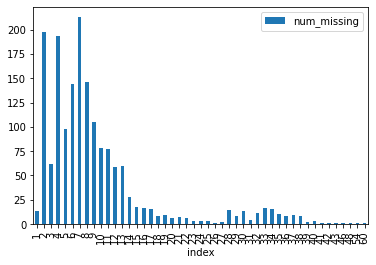

In [ ]:
#Missing Data for Column
import numpy as np

missing_indicators_data = pd.DataFrame()
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        missing_indicators_data['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in missing_indicators_data.columns if 'ismissing' in col]
missing_indicators_data['num_missing'] = missing_indicators_data[ismissing_cols].sum(axis=1)

missing_indicators_data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [ ]:
pct_missing = dict()
for col in data.columns:
    pct_missing[col] = np.mean(data[col].isnull())
    
ordered  = dict(sorted(pct_missing.items(), key=lambda item: item[1]))


for (col,percent_missing) in ordered.items():
  if percent_missing*100 > 0.0:
    print('{} - {}%'.format(col, round(percent_missing*100)))

IM_PG_P - 0%
INF_ANAM - 0%
NA_R_1_n - 0%
zab_leg_01 - 0%
zab_leg_02 - 0%
zab_leg_03 - 0%
zab_leg_04 - 0%
zab_leg_06 - 0%
AGE - 0%
SIM_GIPERT - 0%
GB - 1%
NITR_S - 1%
endocr_02 - 1%
endocr_03 - 1%
fibr_ter_01 - 1%
fibr_ter_02 - 1%
fibr_ter_03 - 1%
fibr_ter_05 - 1%
fibr_ter_06 - 1%
fibr_ter_07 - 1%
fibr_ter_08 - 1%
NOT_NA_1_n - 1%
LID_S_n - 1%
endocr_01 - 1%
B_BLOK_S_n - 1%
O_L_POST - 1%
SVT_POST - 1%
GT_POST - 1%
FIB_G_POST - 1%
ANT_CA_S_n - 1%
MP_TP_POST - 1%
K_SH_POST - 1%
R_AB_1_n - 1%
TIKL_S_n - 1%
TRENT_S_n - 1%
GEPAR_S_n - 1%
ASP_S_n - 1%
np_01 - 1%
np_04 - 1%
np_05 - 1%
np_07 - 1%
np_08 - 1%
np_09 - 1%
np_10 - 1%
nr_11 - 1%
nr_01 - 1%
nr_02 - 1%
nr_03 - 1%
nr_04 - 1%
nr_07 - 1%
nr_08 - 1%
IBS_POST - 3%
ZSN_A - 3%
post_im - 4%
FK_STENOK - 4%
lat_im - 5%
inf_im - 5%
ant_im - 5%
STENOK_AN - 6%
R_AB_2_n - 6%
NA_R_2_n - 6%
NOT_NA_2_n - 6%
n_r_ecg_p_01 - 7%
n_r_ecg_p_02 - 7%
n_r_ecg_p_03 - 7%
n_r_ecg_p_04 - 7%
n_r_ecg_p_05 - 7%
n_r_ecg_p_06 - 7%
n_r_ecg_p_08 - 7%
n_r_ecg_p_09 - 7%
n_r_

### Drop Points and Features

In [ ]:
cleaned_data = data.drop(columns = ['S_AD_KBRIG','D_AD_KBRIG','IBS_NASL','KFK_BLOOD'])

index_to_delete = []
missing_thresh = 32
for (index,row)  in enumerate(cleaned_data.values):
    
     n_missings = len([x for x in row if str(x) == 'nan'])
     #print(f'{index} : {n_missings}')
     if (n_missings > missing_thresh ):
       index_to_delete += [index]


print(len(index_to_delete))

cleaned_data = cleaned_data.drop(index = index_to_delete )
cleaned_data


33


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,4.7,0.0,138.0,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,132.0,0.30,0.11,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,3.9,0.0,146.0,0.75,0.37,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,132.0,0.45,0.22,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1695,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,90.0,0.0,0.0,0.0,0.0,0.0,...,3.9,0.0,136.0,0.23,0.18,5.5,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,3
1695,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,3.7,0.0,130.0,1.05,0.52,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1698,1699,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,1.0,0.0,0.0,...,3.1,0.0,136.0,0.45,0.45,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


### Sostituzione del valore mancante con il valore più probabile
 
Per prevedere il valore più probabile sulla base delle altre informazioni presenti nel dataset si è scelto di utilizzare il metodo Nearest Neighbour Imputation. 
 
I valori mancanti di ogni campione sono imputati utilizzando il valore medio di dei K vicini più vicini trovati nel dataset. Due osservazioni sono vicine se le feature  che non mancano a nessuno dei due sono vicine, è stato settato un numero di vicini K = 3.


In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
cleaned_data_imputed = round(pd.DataFrame(imputer.fit_transform(cleaned_data),columns = cleaned_data.columns))
cleaned_data_imputed.head(20)


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,138.0,0.0,0.0,8.0,16.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,132.0,0.0,0.0,8.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,132.0,0.0,0.0,11.0,10.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,146.0,1.0,0.0,7.0,10.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,132.0,0.0,0.0,8.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,64.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,90.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,133.0,0.0,0.0,7.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,70.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,80.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,145.0,0.0,0.0,11.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,8.0,65.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,95.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,136.0,1.0,0.0,6.0,20.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,60.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,120.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,135.0,0.0,0.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,77.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,100.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,133.0,0.0,0.0,7.0,30.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

### Data Scaling
Considerando solo  le variabili numeriche del Dataset ('AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE')
, si normalizzano i valori delle variabili mediante una normalizzazione Z-score


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE']
numerics = cleaned_data_imputed[numeric_features]
std_scaler = StandardScaler()
std_scaler

df_std = pd.DataFrame(std_scaler.fit_transform(numerics), columns=numerics.columns)

for X in numeric_features:
  cleaned_data_imputed[X] = df_std[X]



values = cleaned_data_imputed.LET_IS 


binary_values = []
for value in values:
  binary_values += [ 1 if value > 0.0 else  0]

cleaned_data_imputed['LET_IS'] = binary_values


cleaned_data_imputed


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,1.345656,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.562576,1.022487,0.0,0.0,0.0,0.0,0.0,...,1.072257,0.0,138.0,-0.664580,0.0,-0.235466,0.217312,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,-0.607276,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.525172,0.418574,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,132.0,-0.664580,0.0,-0.235466,-0.966543,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.0,-0.873585,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.562576,1.022487,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,132.0,-0.664580,0.0,0.657306,-0.329083,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,0.546729,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.525172,-0.789254,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,146.0,1.148603,0.0,-0.533057,-0.329083,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5.0,-0.163428,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866660,0.418574,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,132.0,-0.664580,0.0,-0.235466,0.217312,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1695.0,1.345656,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518702,0.418574,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,136.0,-0.664580,0.0,-0.830648,0.581576,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1663,1696.0,1.345656,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.873131,-0.789254,0.0,0.0,0.0,0.0,0.0,...,-0.263657,0.0,130.0,1.148603,1.0,1.252487,-0.693346,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1664,1697.0,0.724269,0.0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.960879,-5.016651,0.0,1.0,0.0,0.0,0.0,...,-0.263657,0.0,138.0,1.148603,0.0,2.145259,-0.966543,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1665,1699.0,1.523196,0.0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,1.0,0.0

Al termine di questo fase di preprocessing si esportano i dati in formato CSV.

In [ ]:
cleaned_data_imputed.to_csv(working_dir + 'cleaned_data.csv',index=False)

dataframe = pd.read_csv(working_dir + 'cleaned_data.csv').drop(columns = ['ID'])
dataframe

## Modeling

In [ ]:
import numpy as np                                # For data management
import pandas as pd                               # For data management

import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization
import math
from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
              # To instantiate, train and use model
from sklearn import metrics  


working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'
def MultiLabelMultiClass(Y):
  Y_class = []
  num_classes= 0
  classes_mapper = dict()
  for y in Y.values:
    class_label = ''
    for y_i in y:
      class_label += str(int(y_i)) + ' '

    if class_label not in classes_mapper.keys():
      classes_mapper[class_label] = num_classes
      #print(f'{class_label} -> {num_classes}')
      num_classes += 1
    Y_class += [classes_mapper[class_label]]
  
  return Y_class,classes_mapper


# separate variabile of input (X) from variabile of output(y)

dataframe = pd.read_csv(working_dir + 'cleaned_data.csv').drop(columns = ['ID'])
X = dataframe.iloc[:,0:108]
#X = dataframe[['AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE']]
y = dataframe.iloc[:,108:]



# convert  binary multi label in a unique multi class label
y_class, mapper = MultiLabelMultiClass(y)

X

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,...,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
0,1.345656,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.562576,1.022487,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.072257,0.0,138.0,-0.664580,0.0,-0.235466,0.217312,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.607276,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.525172,0.418574,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.263657,0.0,132.0,-0.664580,0.0,-0.235466,-0.966543,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,-0.873585,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.562576,1.022487,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.263657,0.0,132.0,-0.664580,0.0,0.657306,-0.329083,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.546729,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.525172,-0.789254,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.263657,0.0,146.0,1.148603,0.0,-0.533057,-0.329083,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.163428,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866660,0.418574,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.263657,0.0,132.0,-0.664580,0.0,-0.235466,0.217312,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1.345656,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518702,0.418574,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.263657,0.0,136.0,-0.664580,0.0,-0.830648,0.581576,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1663,1.345656,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.873131,-0.789254,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.263657,0.0,130.0,1.148603,1.0,1.252487,-0.693346,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1664,0.724269,0.0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.960879,-5.016651,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.263657,0.0,138.0,1.148603,0.0,2.145259,-0.966543,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,1.52

In [ ]:
#!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

import numpy as np


SEED = 4

# Gini Coefficent Implementations

def GiniAVG(cluster_labels,class_labels):
  def Gini(cluster_labels,class_labels,cluster_index):
    class_labels = np.array(class_labels)
    cluster_labels = np.array(cluster_labels)
    N = len(np.unique(class_labels))
    M_j = list(cluster_labels).count(cluster_index)
    idx_point_cluster = np.where(cluster_labels == cluster_index)[0]

    Gini = 0

    for i in range(N):
      #print(class_labels)
      idx_point_class = np.where(class_labels == i)[0]
      m_ij= len(set(idx_point_cluster) & set(idx_point_class))
      Gini += math.pow((m_ij/M_j),2)
    return 1 - Gini

  N_cluster = len(np.unique(cluster_labels))
  G_avg_num = 0
  for j in range(N_cluster):
    M_j = list(cluster_labels).count(j)
    G_avg_num +=  Gini(cluster_labels,class_labels,j)*M_j
  
  G_avg_den = 0
  for j in range(N_cluster):
    M_j = list(cluster_labels).count(j)
    G_avg_den += M_j

  return G_avg_num/G_avg_den


def K_search(X,y,score_fn,models = [('')],min_k = 2,max_k = 40,step = 1,verbose=True):
  import matplotlib.pyplot as plt
  
  scores = dict()


  for (name,Model) in models:
    scores[name] = []
    for k in range(min_k,max_k,step):
      
      y_cluster = Model(n_clusters=k).fit(X).labels_
      score = score_fn(y_cluster,y)
      if verbose:
        print(f'{name} number of cluster {k} Score : {score}')
      scores[name] += [(k,score)]

  for name in scores.keys():
    ks = []
    Gini = []

    for x in scores[name]:
      ks +=   [x[0]]
      Gini += [x[1]]
    

    plt.plot(ks,Gini,label= name)

  plt.xlabel('Number of Cluster')
  plt.ylabel('Gini')
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.1)
  plt.show()



K_search(X,y_class,
         models = [('K-Medoids',KMedoids)],
         min_k = 2,
         max_k = 200,
         step = 10,
         score_fn= GiniAVG)



K-Medoids number of cluster 2 Score : 0.783631526168529
K-Medoids number of cluster 12 Score : 0.7724784976083392
K-Medoids number of cluster 22 Score : 0.7670509713322382
K-Medoids number of cluster 32 Score : 0.7592645650408835
K-Medoids number of cluster 42 Score : 0.7517233921037215
K-Medoids number of cluster 52 Score : 0.7431300726233041
K-Medoids number of cluster 62 Score : 0.7381542815931103
K-Medoids number of cluster 72 Score : 0.7349810316801499
K-Medoids number of cluster 82 Score : 0.7284803754490153
K-Medoids number of cluster 92 Score : 0.7188263372829572


KeyboardInterrupt: ignored

### OC index

Number of Cluster 2, Method : single, Score : 0.20428864506860317
Number of Cluster 2, Method : average, Score : 0.20428864506860317
Number of Cluster 2, Method : complete, Score : 0.20411426943486677
Number of Cluster 3, Method : single, Score : 0.2040663875491288
Number of Cluster 3, Method : average, Score : 0.20402122096575848
Number of Cluster 3, Method : complete, Score : 0.20955248487104494
Number of Cluster 4, Method : single, Score : 0.20409108606422272
Number of Cluster 4, Method : average, Score : 0.20409398899549136
Number of Cluster 4, Method : complete, Score : 0.21240890105012067
Number of Cluster 5, Method : single, Score : 0.20382517971886527
Number of Cluster 5, Method : average, Score : 0.20232662339154717
Number of Cluster 5, Method : complete, Score : 0.21236691220729395
Number of Cluster 6, Method : single, Score : 0.2037171395860394
Number of Cluster 6, Method : average, Score : 0.2029696013314003
Number of Cluster 6, Method : complete, Score : 0.2129132708072485

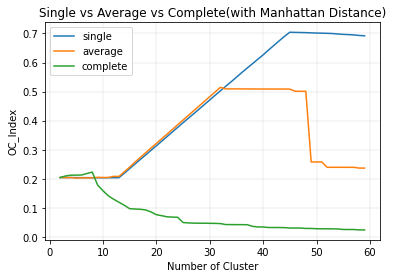

In [12]:
import pandas as pd
import numpy as np




def cluster_intersection(c_i,c_j):
  
  intersection_counts = 0
  for (x_i,x_j) in zip(c_i,c_j) :
    #print(data_point_idx)
    if(x_i == x_j) and x_i == 1:
        intersection_counts += 1
    
  
  
  return intersection_counts
  
def count_objects(cluster_solution):
  n,m = cluster_solution.shape
  unique, counts = np.unique(cluster_solution, return_counts=True)
  return dict(zip(unique, counts))[1]


def p_tilde(cluster_solution):
  cluster_solution = np.array(cluster_solution)
  k = cluster_solution.shape[1]
  N = cluster_solution.shape[0]
  p_value = 0
  for i in range(k):
    len_c_i = list(cluster_solution[:,i]).count(1)
    p_value += len_c_i * (len_c_i - 1)

  denominator = k*N*(N-1)
  return p_value/denominator
    

def t_tilde(clustering_a,clustering_b):
  clustering_a = np.array(clustering_a)
  clustering_b = np.array(clustering_b)

  # n_a e n_b resent the number of objects 
  # that can be counted in solutions considering every overlap
  n_a = count_objects(clustering_a) 
  n_b = count_objects(clustering_b)

  N = clustering_a.shape[0]
  M_a = clustering_a.shape[1]
  M_b = clustering_b.shape[1]

  t_value = 0
  for i in range(M_a):
       for j in range(M_b):
         c_ij = cluster_intersection(clustering_a[:,i],clustering_b[:,j])
         P_ij =  c_ij *(c_ij -1) 
         t_value +=  P_ij

  denominator = (N*(N -1)) *(max(n_a,n_b)/ N) * min(M_a,M_b)
       
  
  return t_value/denominator


def OC_index(clustering_a,clustering_b):
  return (t_tilde(clustering_a,clustering_b)) / (max(p_tilde(clustering_a),p_tilde(clustering_b)))


#!pip install scikit-learn-extra

#==================================================================

#from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans,MiniBatchKMeans,AgglomerativeClustering



def k_Search(X,y_true,linkage_methods = [], min_k = 2,max_k = 40,step = 1,verbose=True):
  import matplotlib.pyplot as plt
  scores = dict()
  ks = []
  for linkage_method in linkage_methods:
    scores[linkage_method] = []
  for k in range(min_k,max_k,step):
    ks += [k]
    for linkage_method in linkage_methods:
      y_pred =  AgglomerativeClustering(n_clusters = k,affinity ='manhattan' ,linkage = linkage_method).fit(X).labels_
    
      cluster_solution = pd.DataFrame(data = {'cluster' : y_pred})
      y_pred = pd.get_dummies(cluster_solution.cluster,prefix='C')
      score = OC_index(y_true,y_pred)
      if verbose:
        print(f'Number of Cluster {k}, Method : {linkage_method}, Score : {score}')
      scores[linkage_method] += [score]

  scores_method = dict()
  for linkage_method in linkage_methods:
    scores_method[linkage_method] = []
    for score in scores[linkage_method]:
      scores_method[linkage_method] += [score]
  
    plt.plot(ks,scores_method[linkage_method],label = linkage_method )
    
  
  plt.title('Single vs Average vs Complete(with Manhattan Distance)')
 
  plt.xlabel('Number of Cluster')
  plt.ylabel('OC_Index')
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()





#============================main================================
working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'


dataframe = pd.read_csv(working_dir + 'cleaned_data.csv').drop(columns = ['ID'])
X = dataframe.iloc[:,0:107]
#X = dataframe[['AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE']]
y = dataframe.iloc[:,107:]


no_comp = []
for data_point_idx,values in enumerate(y.values):
  #print(values)
 
  no_comp += [1 if (list(values).count(1) == 0) else 0 ] 

y['NO_COMP'] = no_comp


from sklearn.manifold import Isomap





k_Search(X,y,linkage_methods = ['single','average','complete'],min_k = 2,max_k=60)






In [ ]:
def k_Search(X,y_true,linkage_methods = [], min_k = 2,max_k = 40,step = 1,verbose=True):
  import matplotlib.pyplot as plt
  scores = dict()
  ks = []
  for linkage_method in linkage_methods:
    scores[linkage_method] = []
  for k in range(min_k,max_k,step):
    ks += [k]
    for linkage_method in linkage_methods:
      y_pred =  AgglomerativeClustering(n_clusters = k,affinity = 'manhattan',linkage = linkage_method).fit(X).labels_
      y_pred = pd.get_dummies(y_pred,prefix='C')
      complications_for_cluster = dict()

      for cluster_i in y_pred.columns:
        complications_for_cluster[cluster_i] = []
        data_points_idxs = np.where( y_pred[cluster_i] == 1)[0]
        
        for  idx in data_points_idxs:
          complications_for_idx = []
          for complication in y.columns:
            if y[complication][idx] == 1:
              complications_for_idx += [complication]
          
          complications_for_cluster[cluster_i] += [str(tuple(complications_for_idx))]

      for cluster_i in complications_for_cluster.keys():
        unique, counts = np.unique(complications_for_cluster[cluster_i], return_counts=True)
        complications_for_cluster[cluster_i] = dict(zip(unique, counts))


      ConfusionMatrix = pd.DataFrame(data = complications_for_cluster).fillna(0)



      score = PurityAvg(ConfusionMatrix)
      if verbose:
        print(f'Number of Cluster {k}, Method : {linkage_method}, Score : {score}')
      scores[linkage_method] += [score]

  scores_method = dict()
  for linkage_method in linkage_methods:
    scores_method[linkage_method] = []
    for score in scores[linkage_method]:
      scores_method[linkage_method] += [score]
  
    plt.plot(ks,scores_method[linkage_method],label = linkage_method )
    
  
  plt.title('Single vs Average vs Complete (with Manhattan Distance)')
 
  plt.xlabel('Number of Cluster')
  plt.ylabel('Purity')
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()

def Gini(ConfusionMatrix,cluster):
  N = sum(ConfusionMatrix[cluster])
  P_j = 0
  for i in range(ConfusionMatrix.shape[0]):
    m_ij = ConfusionMatrix[cluster][i]
    P_j += (m_ij/N)**2
  return 1 - P_j


def GiniAvg(ConfusionMatrix):
  Gini_Index = 0
  Den = 0
  for cluster_j in ConfusionMatrix.columns:
    Gini_Index += Gini(ConfusionMatrix,cluster_j)*sum(ConfusionMatrix[cluster_j])
  
  for cluster_j in ConfusionMatrix.columns:
    Den += sum(ConfusionMatrix[cluster_j])
  return Gini_Index/Den


def Purity(ConfusionMatrix,cluster):
  N = sum(ConfusionMatrix[cluster])
  P_j = []
  for i in range(ConfusionMatrix.shape[0]):
    m_ij = ConfusionMatrix[cluster][i]
    P_j += [m_ij]
  return max(P_j)


def PurityAvg(ConfusionMatrix):
  Gini_Index = 0
  Den = 0
  for cluster_j in ConfusionMatrix.columns:
    Gini_Index += Purity(ConfusionMatrix,cluster_j)
  
  for cluster_j in ConfusionMatrix.columns:
    Den += sum(ConfusionMatrix[cluster_j])
  return Gini_Index/Den


k_Search(X,y,linkage_methods = ['complete','single','average'], min_k = 2,max_k = 1000,step = 1)
 


Number of Cluster 2, Method : complete, Score : 0.3935212957408518
Number of Cluster 2, Method : single, Score : 0.394121175764847
Number of Cluster 2, Method : average, Score : 0.394121175764847
Number of Cluster 3, Method : complete, Score : 0.3935212957408518
Number of Cluster 3, Method : single, Score : 0.39472105578884226
Number of Cluster 3, Method : average, Score : 0.39472105578884226
Number of Cluster 4, Method : complete, Score : 0.3935212957408518
Number of Cluster 4, Method : single, Score : 0.39532093581283745
Number of Cluster 4, Method : average, Score : 0.39532093581283745
Number of Cluster 5, Method : complete, Score : 0.3935212957408518
Number of Cluster 5, Method : single, Score : 0.39592081583683264
Number of Cluster 5, Method : average, Score : 0.39532093581283745
Number of Cluster 6, Method : complete, Score : 0.3935212957408518
Number of Cluster 6, Method : single, Score : 0.39592081583683264
Number of Cluster 6, Method : average, Score : 0.397120575884823
Number

In [149]:
y_pred =  AgglomerativeClustering(n_clusters = 21 ,affinity = 'manhattan',linkage = 'complete').fit(X).labels_
y_pred = pd.get_dummies(y_pred,prefix='C')
complications_for_cluster = dict()
 
for cluster_i in y_pred.columns:
  complications_for_cluster[cluster_i] = []
  data_points_idxs = np.where( y_pred[cluster_i] == 1)[0]
  
  for  idx in data_points_idxs:
    complications_for_idx = []
    for complication in y.columns:
      if y[complication][idx] == 1:
        complications_for_idx += [complication]
    
    complications_for_cluster[cluster_i] += [str(tuple(complications_for_idx))]

for cluster_i in complications_for_cluster.keys():
  unique, counts = np.unique(complications_for_cluster[cluster_i], return_counts=True)
  complications_for_cluster[cluster_i] = dict(zip(unique, counts))
print(complications_for_cluster)

ConfusionMatrix = pd.DataFrame(data = complications_for_cluster).fillna(0)

ConfusionMatrix

{'C_0': {"('A_V_BLOK',)": 1, "('DRESSLER', 'ZSN')": 1, "('DRESSLER',)": 4, "('FIBR_JELUD', 'LET_IS')": 1, "('FIBR_JELUD', 'P_IM_STEN')": 1, "('FIBR_JELUD', 'ZSN')": 1, "('FIBR_JELUD',)": 1, "('FIBR_PREDS', 'FIBR_JELUD')": 1, "('FIBR_PREDS', 'OTEK_LANC')": 2, "('FIBR_PREDS', 'OTEK_LANC', 'ZSN', 'LET_IS')": 1, "('FIBR_PREDS', 'PREDS_TAH')": 1, "('FIBR_PREDS', 'ZSN')": 4, "('FIBR_PREDS', 'ZSN', 'REC_IM')": 1, "('FIBR_PREDS',)": 8, "('JELUD_TAH', 'FIBR_JELUD', 'LET_IS')": 1, "('JELUD_TAH', 'ZSN', 'REC_IM')": 1, "('LET_IS',)": 13, "('NO_COMP',)": 67, "('OTEK_LANC', 'LET_IS')": 1, "('OTEK_LANC', 'REC_IM')": 1, "('OTEK_LANC', 'REC_IM', 'LET_IS')": 1, "('OTEK_LANC', 'REC_IM', 'P_IM_STEN')": 1, "('OTEK_LANC', 'ZSN')": 3, "('OTEK_LANC', 'ZSN', 'REC_IM')": 2, "('OTEK_LANC',)": 2, "('PREDS_TAH',)": 1, "('P_IM_STEN',)": 15, "('RAZRIV', 'LET_IS')": 2, "('REC_IM', 'LET_IS')": 3, "('REC_IM', 'P_IM_STEN')": 2, "('REC_IM',)": 5, "('ZSN', 'REC_IM')": 4, "('ZSN', 'REC_IM', 'LET_IS')": 1, "('ZSN',)": 24}, 

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,C_19,C_20
"('A_V_BLOK',)",1.0,0.0,5.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
"('DRESSLER', 'ZSN')",1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
"('DRESSLER',)",4.0,0.0,5.0,0.0,2.0,8.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,2.0,6.0,0.0,1.0,0.0
"('FIBR_JELUD', 'LET_IS')",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
"('FIBR_JELUD', 'P_IM_STEN')",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('OTEK_LANC', 'RAZRIV', 'REC_IM', 'LET_IS')",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"('PREDS_TAH', 'REC_IM', 'P_IM_STEN')",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"('FIBR_JELUD', 'REC_IM')",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('FIBR_PREDS', 'DRESSLER', 'ZSN', 'LET_IS')",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Frequent Pattern Mining

In [ ]:
from efficient_apriori import apriori
"""
transactions = [('eggs', 'bacon', 'soup'),
                ('eggs', 'bacon', 'apple'),
                ('soup', 'bacon', 'banana')]
itemsets, rules = apriori(transactions, min_support=0.1, min_confidence=1)
print(rules)  # [{eggs} -> {bacon}, {soup} -> {bacon}]
"""

def get_binary_variabile_indexs(data):
  binary_idx = []
  for (idx,col) in enumerate(data.columns):
    if len(np.unique(data[col])) > 2:
      continue
    binary_idx += [idx]
  return binary_idx


def transaction_format(data):
  transactions = []

  for transaction_idx in range(len(data)):
    itemset  = []
    for item in data.columns:
      print(f'transaction_idx {transaction_idx} item {item}')
      if data.iloc[transaction_idx][item] == 1:
        itemset += [item]
    transactions += [tuple(itemset)]
  return transactions
"""
transactions = transaction_format(binary_data)
transactions
"""

binary_idxs = get_binary_variabile_indexs(dataframe)
binary_data = dataframe.iloc[:,binary_idxs]
binary_data


,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,...,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,GIPER_NA,NA_KB,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1665,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.

No handles with labels found to put in legend.


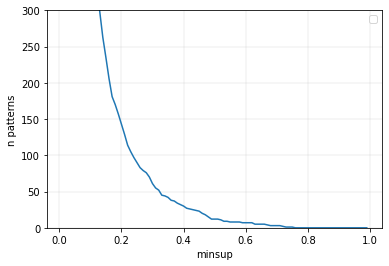

In [ ]:
def all_itemsets(itemsets):
  itemsets_ = []
  for itemset_k in itemsets.values():
    for itemset,support in itemset_k.items():
      itemsets_ += [itemset]
  return itemsets_





def AprioriSearch(transaction,step = 1):
  import matplotlib.pyplot as plt
  n_pattern = []
  minsup_values = []
  minconf= 0.9
  for i in range(1,100,step):
    minsup = i/100
    itemsets, rules = apriori(transactions, min_support=minsup, min_confidence = minconf)
    n_pattern += [len(all_itemsets(itemsets))]
    minsup_values += [minsup]


  plt.plot(minsup_values,n_pattern)
  plt.xlabel('minsup')
  plt.ylabel('n patterns')
  plt.ylim((0.0,300))
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()
  



AprioriSearch(transactions)

In [ ]:

itemsets, rules = apriori(transactions, min_support=0.25, min_confidence = 0.82)


itemsets_table_data = {'frequent pattern' : [], 'support' : []}

for itemset_k in itemsets.values():
  for itemset,support in itemset_k.items():
    itemsets_table_data['frequent pattern'] += [ f' { itemset}']
    itemsets_table_data['support'] += [f'{support}']



pd.DataFrame(itemsets_table_data).to_markdown()


rules



[{GEPAR_S_n} -> {ASP_S_n},
 {ASP_S_n, NA_KB} -> {GEPAR_S_n},
 {GEPAR_S_n, NOT_NA_KB} -> {ASP_S_n},
 {GEPAR_S_n, SEX} -> {ASP_S_n},
 {ANT_CA_S_n, GEPAR_S_n} -> {ASP_S_n},
 {GEPAR_S_n, ritm_ecg_p_01} -> {ASP_S_n},
 {ASP_S_n, NA_KB, NOT_NA_KB} -> {GEPAR_S_n},
 {GEPAR_S_n, NA_KB, SEX} -> {ASP_S_n},
 {ASP_S_n, NA_KB, SEX} -> {GEPAR_S_n},
 {GEPAR_S_n, NOT_NA_KB, SEX} -> {ASP_S_n},
 {ASP_S_n, NOT_NA_KB, SEX} -> {GEPAR_S_n},
 {ANT_CA_S_n, GEPAR_S_n, SEX} -> {ASP_S_n},
 {ANT_CA_S_n, GEPAR_S_n, ritm_ecg_p_01} -> {ASP_S_n},
 {GEPAR_S_n, NA_KB, ritm_ecg_p_01} -> {ASP_S_n},
 {ASP_S_n, NA_KB, ritm_ecg_p_01} -> {GEPAR_S_n},
 {GEPAR_S_n, SEX, ritm_ecg_p_01} -> {ASP_S_n},
 {ASP_S_n, SEX, ritm_ecg_p_01} -> {GEPAR_S_n},
 {GEPAR_S_n, NOT_NA_KB, ritm_ecg_p_01} -> {ASP_S_n},
 {ASP_S_n, NOT_NA_KB, ritm_ecg_p_01} -> {GEPAR_S_n},
 {ANT_CA_S_n, GEPAR_S_n, NOT_NA_KB} -> {ASP_S_n}]

In [ ]:
[]